In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

from lib.kmeans import KMeans

In [3]:
np.random.seed(0)

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, _ = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [5]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

In [6]:
model.cluster_centers_

array([[ 1.07705469, -1.06730994],
       [ 0.96700708,  1.01837274],
       [-1.07159013, -1.00648645]])

In [7]:
np.random.seed(0)
X_new, _ = make_blobs(n_samples=10, centers=centers, cluster_std=0.7)
X_new, model.predict(X_new)

(array([[ 2.04585535, -1.14361078],
        [ 1.68511659,  2.56862524],
        [-0.8991695 ,  0.01799145],
        [-0.46727359, -0.91482749],
        [ 1.66506189,  0.89404995],
        [-1.0722532 , -0.71258105],
        [ 2.30729059,  0.31590548],
        [ 1.31070426, -0.76642797],
        [ 2.23483664,  1.28011005],
        [ 1.21914739, -1.59786702]]),
 array([0, 1, 2, 2, 1, 2, 1, 0, 1, 0]))

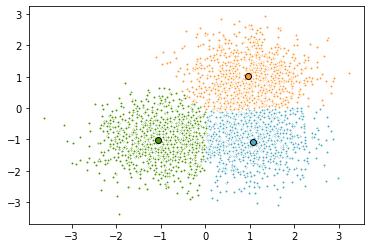

In [8]:
# adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = model.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

ax = plt.axes()

for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)